In [1]:
from qspmodel import *
from chemo_qspmodel import *
import pandas as pd
import csv
import os
import scipy as sp

# some global parameters
clusters=3 #number of clusters

#number_of_cycles=6
cycle_time=35
injection_time=2
n_cycles=2

start_treatment = 7
T=200
t=np.linspace(0, T, 2001)

# pre-defined parameters for treatment deltas, typical drug_dose
drug_deltas=[1.4466, 8.3178, 39.9253]
baseline_drug_dose=[381.90955, 1.19347, 1.90955]
drug_dose=[381.90955, 1.19347, 1.90955]


# create parameters for step function 
A1infusion = [np.array([21, 127/6]),  np.array([28, 169/6])]
A2infusion = [np.array([0, 1/6]), np.array([1, 7/6])]
A3infusion = [np.array([0, 1/6]), np.array([1, 7/6])]
infusion_idx = np.concatenate([15*np.ones(n_cycles*len(A1infusion)), 16*np.ones(n_cycles*len(A2infusion)), 
                               17*np.ones(n_cycles*len(A3infusion))]).astype(int)

infusion_vals = np.concatenate([(drug_dose[0]/baseline_drug_dose[0])*drug_deltas[0]/(A1infusion[0][1] - A1infusion[0][0])*np.ones(n_cycles*len(A1infusion)),
                                (drug_dose[1]/baseline_drug_dose[1])*drug_deltas[1]/(A2infusion[0][1] - A2infusion[0][0])*np.ones(n_cycles*len(A2infusion)),
                                (drug_dose[2]/baseline_drug_dose[2])*drug_deltas[2]/(A3infusion[0][1] - A3infusion[0][0])*np.ones(n_cycles*len(A3infusion))])



infusion_intervals = np.concatenate([[start_treatment+i*cycle_time+j for i in range(n_cycles) for j in A1infusion],
                                     [start_treatment+i*cycle_time+j for i in range(n_cycles) for j in A2infusion],
                                     [start_treatment+i*cycle_time+j for i in range(n_cycles) for j in A3infusion]])


#other parameters
nvar=OS_MAP_Functions().nvar # number of variables
nparam=OS_MAP_Functions().nparam # number of parameters


In [2]:
print(infusion_intervals)
print(infusion_idx)
print(infusion_vals)

[[28.         28.16666667]
 [35.         35.16666667]
 [63.         63.16666667]
 [70.         70.16666667]
 [ 7.          7.16666667]
 [ 8.          8.16666667]
 [42.         42.16666667]
 [43.         43.16666667]
 [ 7.          7.16666667]
 [ 8.          8.16666667]
 [42.         42.16666667]
 [43.         43.16666667]]
[15 15 15 15 16 16 16 16 17 17 17 17]
[  8.6796   8.6796   8.6796   8.6796  49.9068  49.9068  49.9068  49.9068
 239.5518 239.5518 239.5518 239.5518]


In [3]:
# infusion function
r= step_vector(nvar, indices=infusion_idx, intervals=infusion_intervals, values=infusion_vals)

for i in range(80):
    print(r.__call__(i))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[  0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.      49.9068
 239.5518]
[  0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.      49.9068
 239.5518]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0

In [4]:
clustercells = pd.read_csv('input/TARGET_steady_states.csv')
clustercells.drop('Unnamed: 0', axis=1, inplace=True)
clustercells = clustercells.to_numpy()

meanvals = pd.read_csv('input/TARGET_avg_by_cluster.csv')
meanvals.drop('Unnamed: 0', axis=1, inplace=True)
meanvals = meanvals.to_numpy()

### Local sensitivity analysis

In [6]:
# Initial conditions with steady state tumors
IC = np.ones((3, 14))
IC = np.concatenate([IC, np.zeros((3,3))], axis=1)
IC

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
        0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
        0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
        0.]])

#### Perturb params by 10% in each direction

In [8]:
import time

if not os.path.exists('Results/Sensitivity'):
    os.makedirs('Results/Sensitivity/')
    
    
# some global parameters
lmod=[0, 1, 2, 3, 4, 5, 6, 8, 9] #indices of variables in cell data (excluding M0)
clusters=3 #number of clusters

T=200
t=np.linspace(0, T, 10*T+1)


#Computations of dynamics
print('Starting sensitivity analysis')


betas = [2.4780, 1.8328, 0.1467]
K_C = 0.9
K_immune = 0.6
a = 16
alphaNCA = 0.8
deltaCTcA3_scale = 1


# Read the parameter perturbation grid
gridlevel=2
gridname='grid19-level'+str(gridlevel)
data = pd.read_csv('input/'+gridname+'.csv').to_numpy()
w=data[:,0]
x=data[:,1:]
del data


# coefficients for variable sensitivity
lambda0=np.zeros((9,2))
lambda0[8,0]=1 # just cancer

sensitivity_radius=10 # perturbation percentage for sensitivity integration
start_time = time.time()

for cluster in range(clusters):
    print('Starting computations for cluster '+str(cluster+1)) 
    filename='Cluster-'+str(cluster+1)+'-results-'
    
    lambda0[0:10,1]=clustercells[cluster,lmod]/np.sum(clustercells[cluster,lmod]) # all cells    

    QSP0=QSP.from_cell_data(clustercells[cluster], meanvals[cluster])
    qspcore=OS_MAP_Functions(parameters=QSP0.par)
    deltaCTcA3 = QSP0.par[37]*deltaCTcA3_scale
    QSP_=QSP.from_data(([drug_deltas, betas, K_C, K_immune, a, alphaNCA, deltaCTcA3, drug_dose, clustercells[cluster]]), qspcore=qspcore)
    params=QSP_.par
    
    dudp = np.zeros((nparam,2))
    dudp_relative = np.zeros((nparam,2))
    for k in range(w.size):
        print(k)
        # set parameter sample
        param_sample=params*(1+(sensitivity_radius*1e-2)*x[k,:])
        QSP_.set_parameters(param_sample);   
        
        # Compute time-dependent sensitivity
        print(' Parameters set. Computing the solution')
        u, _ = QSP_.solve_ode(t, IC[cluster], 'given', inhomogeneity=r, jumps=True)
        print(' Computing local sensitivity')
        S = QSP_.Sensitivity(method="time-full", t=t, IC=IC[cluster], inhomogeneity=r, variables=np.arange(9), jumps=True)
        dudp = dudp+w[k]*np.dot(np.mean(S, axis=0), lambda0)
        dudp_relative = dudp_relative+w[k]*np.dot(np.mean(S*QSP_.par[np.newaxis,:,np.newaxis]/u[:,np.newaxis,np.arange(9)], axis=0),lambda0)
        
    c=csv.writer(open('Results/Sensitivity/'+filename+'sensitivity.csv',"w"))
    c.writerows(dudp)
    del c
    
    c=csv.writer(open('Results/Sensitivity/'+filename+'relative-sensitivity.csv',"w"))
    c.writerows(dudp_relative)
    del c

print('Run time: ', time.time() - start_time)


Starting sensitivity analysis
Starting computations for cluster 1
0
 Parameters set. Computing the solution


C:\Users\Trang Le\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


 Computing local sensitivity


C:\Users\Trang Le\Documents\4th year\Spring 2020\OS treatment model\Code\chemo_qspmodel.py:102: RuntimeWarning: overflow encountered in exp
  -self.par0[40], self.par0[38]*self.par0[54]*x[8], 0, 0, 0, (par[0]*par[11]*par[15]*(par[17] + 1/par[18] - tau/par[18])*x[8])/np.exp(par[0]*x[14]),
C:\Users\Trang Le\Documents\4th year\Spring 2020\OS treatment model\Code\chemo_qspmodel.py:133: RuntimeWarning: overflow encountered in exp
  (par[11]*par[15]*(par[17] + 1/par[18] - tau/par[18])*x[8]*x[14])/np.exp(par[0]*x[14]), 0, 0, 0, 0, 0, 0, 0],


1
 Parameters set. Computing the solution
 Computing local sensitivity
2
 Parameters set. Computing the solution
 Computing local sensitivity
3
 Parameters set. Computing the solution
 Computing local sensitivity
4
 Parameters set. Computing the solution
 Computing local sensitivity
5
 Parameters set. Computing the solution
 Computing local sensitivity
6
 Parameters set. Computing the solution
 Computing local sensitivity
7
 Parameters set. Computing the solution
 Computing local sensitivity
8
 Parameters set. Computing the solution
 Computing local sensitivity
9
 Parameters set. Computing the solution
 Computing local sensitivity
10
 Parameters set. Computing the solution
 Computing local sensitivity
11
 Parameters set. Computing the solution
 Computing local sensitivity
12
 Parameters set. Computing the solution
 Computing local sensitivity
13
 Parameters set. Computing the solution
 Computing local sensitivity
14
 Parameters set. Computing the solution
 Computing local sensitivity
1

In [27]:
par_list = OS_MAP_Functions().parameter_names

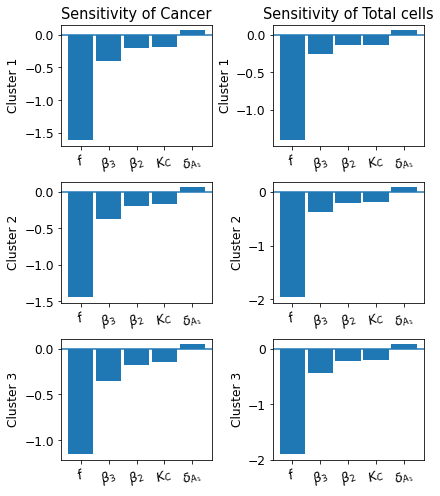

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(3, 2, sharey=False, figsize=(6.5,8))
fig.subplots_adjust(wspace=0.4, hspace=0.3)
plt.rcParams.update({'font.size': 12.3})

axs[0, 0].set_title('Sensitivity of Cancer', fontsize=14.5)
axs[0, 1].set_title('Sensitivity of Total cells', fontsize=14.5)

for cluster in range(clusters):
    filename='Cluster-'+str(cluster+1)+'-results-'
    sensitivity_df = pd.read_csv('Results/Sensitivity/'+filename+'sensitivity.csv', header=None)
    sensitivity_df.index = par_list
    ids_to_remove = ['$a$'] # This parameter is cell cycle time, which is a simple measurement
    
    for i in range(2):
        sensitive_ids = np.abs(sensitivity_df)[i].nlargest(n=20).index
        sensitive_ids = [x for x in sensitive_ids if x not in ids_to_remove]
        sensitivity_df[i][sensitive_ids[:5]].plot.bar(ax=axs[cluster, i], rot=20, width=0.9)
        axs[cluster, i].axhline()
        axs[cluster, i].set_ylabel('Cluster '+str(cluster+1))
        
plt.rc('xtick', labelsize=12.7)
fig.savefig('Figures/Sensitivity.pdf', bbox_inches='tight')
fig.savefig('Figures/Sensitivity.eps', bbox_inches='tight')
fig.savefig('Figures/Sensitivity.png', bbox_inches='tight')   

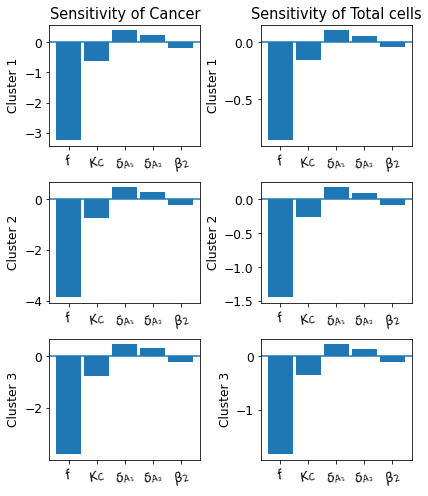

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(3, 2, sharey=False, figsize=(6.5,8))
fig.subplots_adjust(wspace=0.4, hspace=0.3)
plt.rcParams.update({'font.size': 12.3})

axs[0, 0].set_title('Sensitivity of Cancer', fontsize=14.5)
axs[0, 1].set_title('Sensitivity of Total cells', fontsize=14.5)

for cluster in range(clusters):
    filename='Cluster-'+str(cluster+1)+'-results-'
    sensitivity_df = pd.read_csv('Results/Sensitivity/'+filename+'relative-sensitivity.csv', header=None)
    sensitivity_df.index = par_list
    ids_to_remove = ['$a$'] # This parameter is cell cycle time, which is a simple measurement
    
    for i in range(2):
        sensitive_ids = np.abs(sensitivity_df)[i].nlargest(n=20).index
        sensitive_ids = [x for x in sensitive_ids if x not in ids_to_remove]
        sensitivity_df[i][sensitive_ids[:5]].plot.bar(ax=axs[cluster, i], rot=20, width=0.9)
        axs[cluster, i].axhline()
        axs[cluster, i].set_ylabel('Cluster '+str(cluster+1))
        
plt.rc('xtick', labelsize=12.7)
fig.savefig('Figures/Relative_sensitivity.pdf', bbox_inches='tight')
fig.savefig('Figures/Relative_sensitivity.eps', bbox_inches='tight')
fig.savefig('Figures/Relative_sensitivity.png', bbox_inches='tight')   

#### Plot cancer after treatment with different values of assumed parameters

In [24]:
def plot_vary_assumed_param(param, num, colname):
    import matplotlib.pyplot as plt
    from matplotlib.lines import Line2D
    import seaborn as sns

    betas = [2.4780, 1.8328, 0.1467]
    K_C = 0.9
    K_immune = 0.6
    a = 16
    alphaNCA = 0.8
    deltaCTcA3_scale = 1
    
    T=90
    t=np.linspace(0, T, 10*T+1)

    dynamic_all_df = pd.DataFrame(columns=[colname, 'Cluster', 'Cancer cells ($C$)', 'Total cells'])
    if param == 'alphaNCA': UB = 1
    else: UB = 5

    for new_val in np.linspace(0.2, UB, num=num, endpoint=True):
        if param == 'alphaNCA': alphaNCA = new_val
        else: deltaCTcA3_scale = new_val
        dynamic_arr = []

        for cluster in range(clusters):
            print('Starting computations for cluster '+str(cluster+1), new_val) 

            QSP0=QSP.from_cell_data(clustercells[cluster], meanvals[cluster])
            qspcore=OS_MAP_Functions(parameters=QSP0.par)
            deltaCTcA3 = QSP0.par[37]*deltaCTcA3_scale
            print(QSP0.par[37], deltaCTcA3)
            QSP_=QSP.from_data(([drug_deltas, betas, K_C, K_immune, a, alphaNCA, deltaCTcA3, baseline_drug_dose, clustercells[cluster]]), qspcore=qspcore)

            u, _ = QSP_.solve_ode(t, IC[cluster], 'given', inhomogeneity=r, jumps=True)
            # Add last 3 equations scaling value
            scale = np.concatenate([clustercells[cluster], np.array(baseline_drug_dose)/np.array(drug_deltas)])
            u = scale*u

            total_cells_800 = np.sum(u[800][:-7])
            dynamic_arr.append([new_val, cluster, u[800][8], total_cells_800])

        print(dynamic_arr)
        dynamic_df = pd.DataFrame(columns=[colname, 'Cluster', 'Cancer cells ($C$)', 'Total cells'], data=dynamic_arr)
        dynamic_df['Cluster'] = dynamic_df['Cluster'].apply(lambda x: 'Cluster '+str(x+1))
        print(dynamic_df)
        dynamic_all_df = pd.concat([dynamic_all_df, dynamic_df], axis=0)

    palette={'Cluster 1':'#3F9B0B', 'Cluster 2':'#FF796C', 'Cluster 3':'#0343DF'}
    fig, ax = plt.subplots(figsize=(4,3))
    plt.rcParams.update({'font.size': 10})
    sns.lineplot(data=dynamic_all_df, x=colname, y='Cancer cells ($C$)', hue='Cluster', palette=palette, ax=ax)#, legend=False)
    ax.legend_.set_title(None)
    ax.yaxis.major.formatter._useMathText = True
    ax.set_ylim(bottom=0, top=2.7e9)
    ax.xaxis.label.set_size(12.5)
    ax.margins(x=0)

    fig.savefig('Figures/Vary_'+param+'.pdf', bbox_inches='tight')
    fig.savefig('Figures/Vary_'+param+'.eps', bbox_inches='tight')
    fig.savefig('Figures/Vary_'+param+'.png', bbox_inches='tight')
    plt.show()

Starting computations for cluster 1 0.2
0.012269443384292386 0.012269443384292386


C:\Users\Trang Le\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Starting computations for cluster 2 0.2
0.009657389749427571 0.009657389749427571
Starting computations for cluster 3 0.2
0.008401675631568845 0.008401675631568845
[[0.2, 0, 2481958158.0198774, 2673234324.2240014], [0.2, 1, 2610104662.667113, 2805063912.865695], [0.2, 2, 1963965098.9350672, 2679591852.136302]]
   $\alpha_{NCA}$    Cluster  Cancer cells ($C$)   Total cells
0             0.2  Cluster 1        2.481958e+09  2.673234e+09
1             0.2  Cluster 2        2.610105e+09  2.805064e+09
2             0.2  Cluster 3        1.963965e+09  2.679592e+09
Starting computations for cluster 1 0.30000000000000004
0.012269443384292386 0.012269443384292386


C:\Users\Trang Le\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Starting computations for cluster 2 0.30000000000000004
0.009657389749427571 0.009657389749427571
Starting computations for cluster 3 0.30000000000000004
0.008401675631568845 0.008401675631568845
[[0.30000000000000004, 0, 2475751937.556613, 2671181226.4987245], [0.30000000000000004, 1, 2603216572.9815183, 2800656255.801652], [0.30000000000000004, 2, 1943703027.0252705, 2710803425.229636]]
   $\alpha_{NCA}$    Cluster  Cancer cells ($C$)   Total cells
0             0.3  Cluster 1        2.475752e+09  2.671181e+09
1             0.3  Cluster 2        2.603217e+09  2.800656e+09
2             0.3  Cluster 3        1.943703e+09  2.710803e+09
Starting computations for cluster 1 0.4
0.012269443384292386 0.012269443384292386


C:\Users\Trang Le\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Starting computations for cluster 2 0.4
0.009657389749427571 0.009657389749427571
Starting computations for cluster 3 0.4
0.008401675631568845 0.008401675631568845
[[0.4, 0, 2463475579.282606, 2662575847.608228], [0.4, 1, 2607561577.2682123, 2807941701.7019215], [0.4, 2, 1924981299.8548317, 2742867829.4282336]]
   $\alpha_{NCA}$    Cluster  Cancer cells ($C$)   Total cells
0             0.4  Cluster 1        2.463476e+09  2.662576e+09
1             0.4  Cluster 2        2.607562e+09  2.807942e+09
2             0.4  Cluster 3        1.924981e+09  2.742868e+09
Starting computations for cluster 1 0.5
0.012269443384292386 0.012269443384292386


C:\Users\Trang Le\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Starting computations for cluster 2 0.5
0.009657389749427571 0.009657389749427571
Starting computations for cluster 3 0.5
0.008401675631568845 0.008401675631568845
[[0.5, 0, 2460480447.812378, 2663696980.6044016], [0.5, 1, 2609477014.4359746, 2812695868.7609553], [0.5, 2, 1905432009.1167138, 2772374829.4444876]]
   $\alpha_{NCA}$    Cluster  Cancer cells ($C$)   Total cells
0             0.5  Cluster 1        2.460480e+09  2.663697e+09
1             0.5  Cluster 2        2.609477e+09  2.812696e+09
2             0.5  Cluster 3        1.905432e+09  2.772375e+09
Starting computations for cluster 1 0.6000000000000001
0.012269443384292386 0.012269443384292386


C:\Users\Trang Le\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Starting computations for cluster 2 0.6000000000000001
0.009657389749427571 0.009657389749427571
Starting computations for cluster 3 0.6000000000000001
0.008401675631568845 0.008401675631568845
[[0.6000000000000001, 0, 2458846712.8052683, 2666101311.54724], [0.6000000000000001, 1, 2601914117.9303546, 2807738358.0195107], [0.6000000000000001, 2, 1895166612.7893705, 2813616301.7053156]]
   $\alpha_{NCA}$    Cluster  Cancer cells ($C$)   Total cells
0             0.6  Cluster 1        2.458847e+09  2.666101e+09
1             0.6  Cluster 2        2.601914e+09  2.807738e+09
2             0.6  Cluster 3        1.895167e+09  2.813616e+09
Starting computations for cluster 1 0.7
0.012269443384292386 0.012269443384292386


C:\Users\Trang Le\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Starting computations for cluster 2 0.7
0.009657389749427571 0.009657389749427571
Starting computations for cluster 3 0.7
0.008401675631568845 0.008401675631568845
[[0.7, 0, 2449384395.4826374, 2660351028.7940903], [0.7, 1, 2610747538.793136, 2819931359.167739], [0.7, 2, 1887457744.255962, 2856844072.7970266]]
   $\alpha_{NCA}$    Cluster  Cancer cells ($C$)   Total cells
0             0.7  Cluster 1        2.449384e+09  2.660351e+09
1             0.7  Cluster 2        2.610748e+09  2.819931e+09
2             0.7  Cluster 3        1.887458e+09  2.856844e+09
Starting computations for cluster 1 0.8
0.012269443384292386 0.012269443384292386


C:\Users\Trang Le\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Starting computations for cluster 2 0.8
0.009657389749427571 0.009657389749427571
Starting computations for cluster 3 0.8
0.008401675631568845 0.008401675631568845
[[0.8, 0, 2443836744.2144074, 2658539253.5601487], [0.8, 1, 2603327887.331453, 2815241921.5918818], [0.8, 2, 1873067364.2396274, 2892128450.137494]]
   $\alpha_{NCA}$    Cluster  Cancer cells ($C$)   Total cells
0             0.8  Cluster 1        2.443837e+09  2.658539e+09
1             0.8  Cluster 2        2.603328e+09  2.815242e+09
2             0.8  Cluster 3        1.873067e+09  2.892128e+09
Starting computations for cluster 1 0.9000000000000001
0.012269443384292386 0.012269443384292386


C:\Users\Trang Le\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Starting computations for cluster 2 0.9000000000000001
0.009657389749427571 0.009657389749427571
Starting computations for cluster 3 0.9000000000000001
0.008401675631568845 0.008401675631568845
[[0.9000000000000001, 0, 2440058038.267893, 2658683234.1338387], [0.9000000000000001, 1, 2605889429.490102, 2820965008.4759912], [0.9000000000000001, 2, 1862545299.4391227, 2930386142.5847178]]
   $\alpha_{NCA}$    Cluster  Cancer cells ($C$)   Total cells
0             0.9  Cluster 1        2.440058e+09  2.658683e+09
1             0.9  Cluster 2        2.605889e+09  2.820965e+09
2             0.9  Cluster 3        1.862545e+09  2.930386e+09
Starting computations for cluster 1 1.0
0.012269443384292386 0.012269443384292386


C:\Users\Trang Le\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Starting computations for cluster 2 1.0
0.009657389749427571 0.009657389749427571
Starting computations for cluster 3 1.0
0.008401675631568845 0.008401675631568845
[[1.0, 0, 2437803436.0736804, 2660187838.523614], [1.0, 1, 2604300304.026837, 2822282479.3518715], [1.0, 2, 1848675324.2538335, 2964417799.2148237]]
   $\alpha_{NCA}$    Cluster  Cancer cells ($C$)   Total cells
0             1.0  Cluster 1        2.437803e+09  2.660188e+09
1             1.0  Cluster 2        2.604300e+09  2.822282e+09
2             1.0  Cluster 3        1.848675e+09  2.964418e+09


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


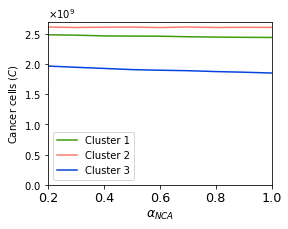

In [25]:
plot_vary_assumed_param('alphaNCA', num=9, colname='$\\alpha_{NCA}$')

Starting computations for cluster 1 0.2
0.012269443384292386 0.0024538886768584772


C:\Users\Trang Le\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Starting computations for cluster 2 0.2
0.009657389749427571 0.0019314779498855142
Starting computations for cluster 3 0.2
0.008401675631568845 0.0016803351263137692
[[0.2, 0, 2442891273.225404, 2657682046.361204], [0.2, 1, 2604010426.9686046, 2815960231.0920873], [0.2, 2, 1873986583.2166054, 2892618077.6059213]]
   $\delta_{C T_c A_3}$    Cluster  Cancer cells ($C$)   Total cells
0                   0.2  Cluster 1        2.442891e+09  2.657682e+09
1                   0.2  Cluster 2        2.604010e+09  2.815960e+09
2                   0.2  Cluster 3        1.873987e+09  2.892618e+09
Starting computations for cluster 1 0.7333333333333334
0.012269443384292386 0.00899759181514775


C:\Users\Trang Le\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Starting computations for cluster 2 0.7333333333333334
0.009657389749427571 0.007082085816246886
Starting computations for cluster 3 0.7333333333333334
0.008401675631568845 0.00616122879648382
[[0.7333333333333334, 0, 2444074563.8463507, 2658789926.9648175], [0.7333333333333334, 1, 2603555385.9428387, 2815481342.864468], [0.7333333333333334, 2, 1873669747.519909, 2892163859.7692194]]
   $\delta_{C T_c A_3}$    Cluster  Cancer cells ($C$)   Total cells
0              0.733333  Cluster 1        2.444075e+09  2.658790e+09
1              0.733333  Cluster 2        2.603555e+09  2.815481e+09
2              0.733333  Cluster 3        1.873670e+09  2.892164e+09
Starting computations for cluster 1 1.2666666666666666
0.012269443384292386 0.015541294953437021


C:\Users\Trang Le\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Starting computations for cluster 2 1.2666666666666666
0.009657389749427571 0.012232693682608256
Starting computations for cluster 3 1.2666666666666666
0.008401675631568845 0.01064212246665387
[[1.2666666666666666, 0, 2443598942.3113966, 2658288598.67884], [1.2666666666666666, 1, 2603100403.320554, 2815002515.546257], [1.2666666666666666, 2, 1865589147.79527, 2881875886.785702]]
   $\delta_{C T_c A_3}$    Cluster  Cancer cells ($C$)   Total cells
0              1.266667  Cluster 1        2.443599e+09  2.658289e+09
1              1.266667  Cluster 2        2.603100e+09  2.815003e+09
2              1.266667  Cluster 3        1.865589e+09  2.881876e+09
Starting computations for cluster 1 1.8
0.012269443384292386 0.022084998091726295


C:\Users\Trang Le\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Starting computations for cluster 2 1.8
0.009657389749427571 0.017383301548969627
Starting computations for cluster 3 1.8
0.008401675631568845 0.015123016136823922
[[1.8, 0, 2443123391.692325, 2657787344.486172], [1.8, 1, 2602645479.0996337, 2814523749.1354675], [1.8, 2, 1868089191.3888688, 2883864754.04199]]
   $\delta_{C T_c A_3}$    Cluster  Cancer cells ($C$)   Total cells
0                   1.8  Cluster 1        2.443123e+09  2.657787e+09
1                   1.8  Cluster 2        2.602645e+09  2.814524e+09
2                   1.8  Cluster 3        1.868089e+09  2.883865e+09
Starting computations for cluster 1 2.3333333333333335
0.012269443384292386 0.02862870123001557


C:\Users\Trang Le\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Starting computations for cluster 2 2.3333333333333335
0.009657389749427571 0.022533909415331
Starting computations for cluster 3 2.3333333333333335
0.008401675631568845 0.019603909806993974
[[2.3333333333333335, 0, 2442647911.9846396, 2657286164.382332], [2.3333333333333335, 1, 2602190613.277948, 2814045043.6301494], [2.3333333333333335, 2, 1867753008.7610164, 2883384099.7797737]]
   $\delta_{C T_c A_3}$    Cluster  Cancer cells ($C$)   Total cells
0              2.333333  Cluster 1        2.442648e+09  2.657286e+09
1              2.333333  Cluster 2        2.602191e+09  2.814045e+09
2              2.333333  Cluster 3        1.867753e+09  2.883384e+09
Starting computations for cluster 1 2.8666666666666667
0.012269443384292386 0.03517240436830484


C:\Users\Trang Le\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Starting computations for cluster 2 2.8666666666666667
0.009657389749427571 0.02768451728169237
Starting computations for cluster 3 2.8666666666666667
0.008401675631568845 0.024084803477164022
[[2.8666666666666667, 0, 2442172503.1845384, 2656785058.3636045], [2.8666666666666667, 1, 2601735805.856856, 2813566399.0319424], [2.8666666666666667, 2, 1867416834.9664397, 2882903455.2975516]]
   $\delta_{C T_c A_3}$    Cluster  Cancer cells ($C$)   Total cells
0              2.866667  Cluster 1        2.442173e+09  2.656785e+09
1              2.866667  Cluster 2        2.601736e+09  2.813566e+09
2              2.866667  Cluster 3        1.867417e+09  2.882903e+09
Starting computations for cluster 1 3.4000000000000004
0.012269443384292386 0.041716107506594116


C:\Users\Trang Le\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Starting computations for cluster 2 3.4000000000000004
0.009657389749427571 0.03283512514805374
Starting computations for cluster 3 3.4000000000000004
0.008401675631568845 0.028565697147334076
[[3.4000000000000004, 0, 2441697165.288735, 2656284026.426732], [3.4000000000000004, 1, 2601281056.831519, 2813087815.3361206], [3.4000000000000004, 2, 1867946275.2866037, 2885079258.614938]]
   $\delta_{C T_c A_3}$    Cluster  Cancer cells ($C$)   Total cells
0                   3.4  Cluster 1        2.441697e+09  2.656284e+09
1                   3.4  Cluster 2        2.601281e+09  2.813088e+09
2                   3.4  Cluster 3        1.867946e+09  2.885079e+09
Starting computations for cluster 1 3.9333333333333336
0.012269443384292386 0.04825981064488339


C:\Users\Trang Le\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Starting computations for cluster 2 3.9333333333333336
0.009657389749427571 0.037985733014415116
Starting computations for cluster 3 3.9333333333333336
0.008401675631568845 0.03304659081750413
[[3.9333333333333336, 0, 2441166909.0168176, 2655731459.480866], [3.9333333333333336, 1, 2600826366.203096, 2812609292.5440826], [3.9333333333333336, 2, 1867636014.967898, 2884633755.079689]]
   $\delta_{C T_c A_3}$    Cluster  Cancer cells ($C$)   Total cells
0              3.933333  Cluster 1        2.441167e+09  2.655731e+09
1              3.933333  Cluster 2        2.600826e+09  2.812609e+09
2              3.933333  Cluster 3        1.867636e+09  2.884634e+09
Starting computations for cluster 1 4.466666666666667
0.012269443384292386 0.05480351378317266


C:\Users\Trang Le\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Starting computations for cluster 2 4.466666666666667
0.009657389749427571 0.04313634088077648
Starting computations for cluster 3 4.466666666666667
0.008401675631568845 0.03752748448767417
[[4.466666666666667, 0, 2440691722.3772783, 2655230574.556304], [4.466666666666667, 1, 2600371733.968787, 2812130830.65322], [4.466666666666667, 2, 1867325794.599185, 2884188304.784683]]
   $\delta_{C T_c A_3}$    Cluster  Cancer cells ($C$)   Total cells
0              4.466667  Cluster 1        2.440692e+09  2.655231e+09
1              4.466667  Cluster 2        2.600372e+09  2.812131e+09
2              4.466667  Cluster 3        1.867326e+09  2.884188e+09
Starting computations for cluster 1 5.0
0.012269443384292386 0.06134721692146193


C:\Users\Trang Le\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Starting computations for cluster 2 5.0
0.009657389749427571 0.048286948747137855
Starting computations for cluster 3 5.0
0.008401675631568845 0.04200837815784422
[[5.0, 0, 2440216606.6288543, 2654729763.7071395], [5.0, 1, 2599917160.1279497, 2811652429.663022], [5.0, 2, 1867015614.2154956, 2883742907.7785497]]
   $\delta_{C T_c A_3}$    Cluster  Cancer cells ($C$)   Total cells
0                   5.0  Cluster 1        2.440217e+09  2.654730e+09
1                   5.0  Cluster 2        2.599917e+09  2.811652e+09
2                   5.0  Cluster 3        1.867016e+09  2.883743e+09


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


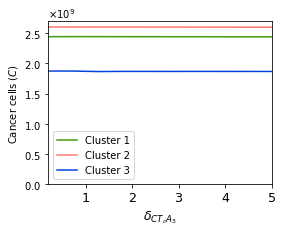

In [26]:
plot_vary_assumed_param('deltaCTcA3', num=10, colname='$\delta_{C T_c A_3}$')